# Glow-ViT results visualized

This is a script that's intended to visualize the performance of various Glow-ViT models evaluated on the low-light exposure datasets we currently have:

1. wildlife_very_dark_test
2. wildlife_grayscale
3. wildlife_less_saturated
4. wildlife_underexposed

## Results (Original dataset without filtering):

|model\eval_loss| original | very dark | illuminate | mixed | very dark test | grayscale | less saturated | underexposed |
|--|---------|------------|------------|-------|----------------|-----------|----------------|----|
|Glow-ViT|0.1246|4.5018|0.0225|0.5657|4.3495|0.2021|0.176|0.351|
|Glow-ViT-Dark|0.2078|0.5554|0.1712|0.2502|0.4528|0.2992 |0.3231      |0.2702|
|Glow-ViT-Illuminate|0.1177|2.1939|0.1064|0.4042|2.2027|0.3929     |0.4334          |0.5756|
|Glow-ViT-Mix|0.0744|0.3715|0.0243|0.1449|0.1396       | 0.0776   | 0.0707 |0.0472|


### Evaluation speed

|model\eval_samples_per_second| original | very dark | illuminate | mixed | very dark test | grayscale | less saturated | underexposed |
|--|---------|------------|------------|-------|----------------|-----------|----------------|----|
|Glow-ViT|13.22|13.087|13.589|12.81|21.118|13.231|20.086|20.162|
|Glow-ViT-Dark|13.027|13.189|13.249|12.587|19.035|12.997                |21.418|21.862|
|Glow-ViT-Illuminate|12.809|12.857|13.223|11.938|19.711             |12.803            |19.972|20.094|
|Glow-ViT-Mix|14.038|13.294 |13.956|12.778|21.091       | 13.254   | 21.135 |20.766|

In [1]:
import matplotlib.pyplot as plt
import numpy as np

datasets = ["original", "very_dark", "illuminate", "mixed", "very_dark_test", "grayscale", "less_saturated", "underexposed"]
models = ["Glow-ViT", "Glow-ViT-dark", "Glow-ViT-illuminate", "Glow-ViT-mix"]
eval_loss = {
    "Glow-ViT": [0.1246, 4.5018, 0.0225, 0.5657, 4.3495, 0.2021, 0.176, 0.351],
    "Glow-ViT-dark": [0.2078, 0.5554, 0.1712, 0.2502, 0.4528, 0.2992, 0.3231, 0.2702],
    "Glow-ViT-illuminate": [0.1177, 2.1939, 0.1064, 0.4042, 2.2027, 0.3929, 0.4334, 0.5756],
    "Glow-ViT-mix": [0.0744, 0.3715, 0.0243, 0.1449, 0.1396, 0.0776, 0.0707, 0.0472]
}
eval_samples_per_second = {
    "Glow-ViT": [13.22, 13.087, 13.589, 12.81, 21.118, 13.231, 20.086, 20.162],
    "Glow-ViT-dark": [13.027, 13.189, 13.249, 12.587, 19.035, 12.997, 21.418, 21.862],
    "Glow-ViT-illuminate": [12.809, 12.857, 13.223, 11.938, 19.711, 12.803, 19.972, 20.094],
    "Glow-ViT-mix": [14.038, 13.294 , 13.956, 12.778, 21.091, 13.254, 21.135, 20.766]
}

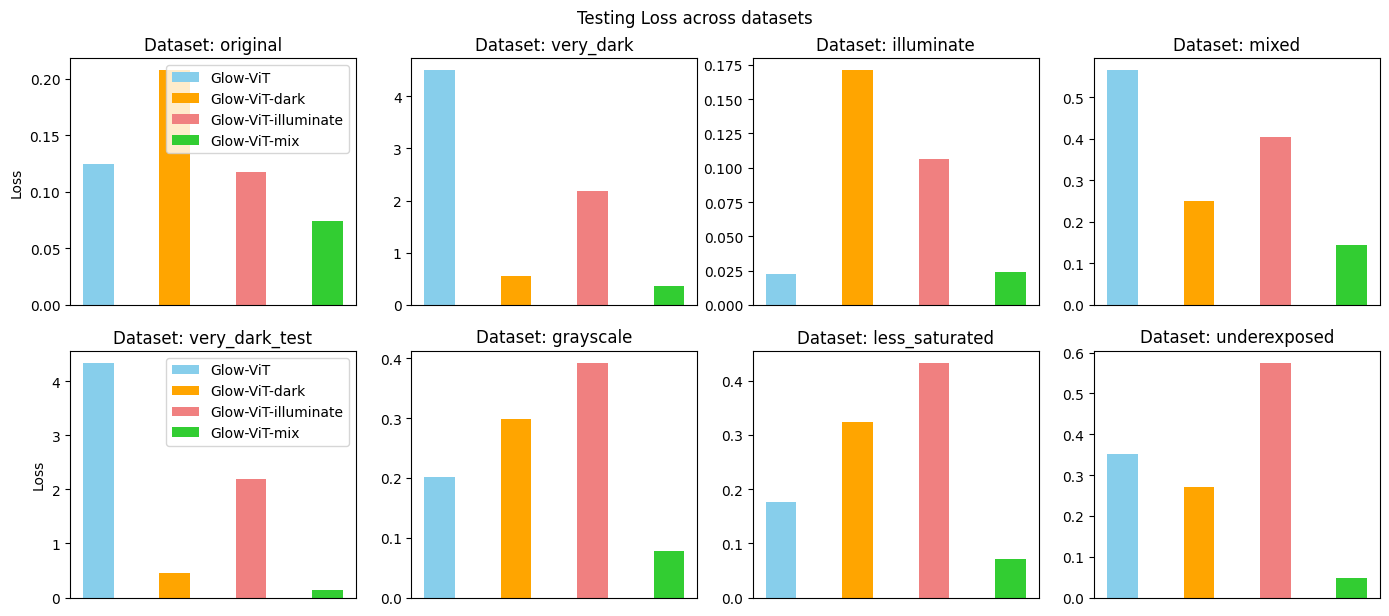

In [2]:

x = np.arange(len(models))
width = 0.4  # the width of the bars
colors = ["skyblue", "orange", "lightcoral", "limegreen"]

fig, axes = plt.subplots(2, 4, figsize=(14, 6), sharex=True)
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    ax = axes[i]
    for j, model in enumerate(models):
        ax.bar(x[j], eval_loss[model][i], width, label=model, color=colors[j])

    # Titles and labels
    ax.set_title(f"Dataset: {dataset}")
    ax.set_xticks([])
    # ax.set_xticklabels(models)
    if i % 4 == 0:
        ax.set_ylabel("Loss")
        ax.legend()

# General layout adjustments
plt.tight_layout()
plt.suptitle("Testing Loss across datasets", fontsize=12, y=1.02)
plt.show()


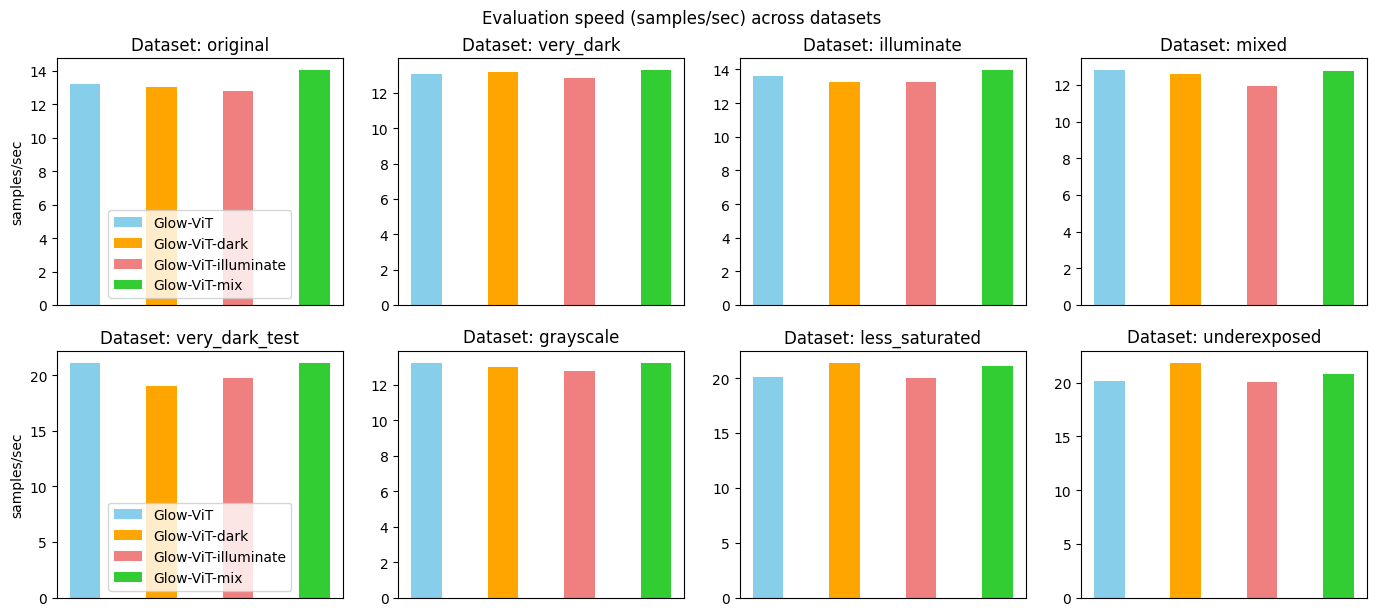

In [3]:

x = np.arange(len(models))
width = 0.4  # the width of the bars
colors = ["skyblue", "orange", "lightcoral", "limegreen"]

fig, axes = plt.subplots(2, 4, figsize=(14, 6), sharex=True)
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    ax = axes[i]
    for j, model in enumerate(models):
        ax.bar(x[j], eval_samples_per_second[model][i], width, label=model, color=colors[j])

    # Titles and labels
    ax.set_title(f"Dataset: {dataset}")
    ax.set_xticks([])
    # ax.set_xticklabels(models)
    if i % 4 == 0:
        ax.set_ylabel("samples/sec")
        ax.legend(loc='lower center')

# General layout adjustments
plt.tight_layout()
plt.suptitle("Evaluation speed (samples/sec) across datasets", fontsize=12, y=1.02)
plt.show()


## Results (Dataset with filtering):

Below are the results of the following dataset (didn't do grayscale due to lack of suitable algorithms)

1. wildlife_very_dark_test
2. wildlife_less_saturated
3. wildlife_underexposed

going through 3 different filters to process low-light images:

- Histogram Equalization (HE)
- CLAHE
- AFIFI

### wildlife_very_dark

| Model             | Dataset                              | Eval Loss | Eval Samples Per Second |
|--------------------|--------------------------------------|-----------|--------------------------|
| Glow-ViT          | wildlife_verydark_clahe             | 0.075     | 18.797                   |
| Glow-ViT          | wildlife_verydark_he                | 0.1791    | 18.119                   |
| Glow-ViT          | wildlife_verydark_afifi             | 0.4517    | 19.199                   |
| Glow-ViT-dark     | wildlife_verydark_clahe             | 0.2089    | 18.775                   |
| Glow-ViT-dark     | wildlife_verydark_he                | 0.2324    | 18.86                    |
| Glow-ViT-dark     | wildlife_verydark_afifi             | 0.3838    | 18.761                   |
| Glow-ViT-illuminate | wildlife_verydark_clahe           | 0.3039    | 19.033                   |
| Glow-ViT-illuminate | wildlife_verydark_he              | 0.419     | 20.752                   |
| Glow-ViT-illuminate | wildlife_verydark_afifi           | 0.6543    | 20.576                   |
| Glow-ViT-mix      | wildlife_verydark_clahe             | 0.1768    | 17.821                   |
| Glow-ViT-mix      | wildlife_verydark_he                | 0.1925    | 18.962                   |
| Glow-ViT-mix      | wildlife_verydark_afifi             | 0.1952    | 18.662                   |

### wildlife_less_saturated


| Model              | Dataset                              | Eval Loss | Eval Samples Per Second |
|--------------------|--------------------------------------|-----------|--------------------------|
| Glow-ViT          | wildlife_less_saturated_clahe        | 0.4322    | 19.202                   |
| Glow-ViT          | wildlife_less_saturated_he           | 0.1722    | 20.912                   |
| Glow-ViT          | wildlife_less_saturated_afifi        | 0.1746    | 21.745                   |
| Glow-ViT-dark     | wildlife_less_saturated_clahe        | 0.5156    | 20.770                   |
| Glow-ViT-dark     | wildlife_less_saturated_he           | 0.2069    | 22.236                   |
| Glow-ViT-dark     | wildlife_less_saturated_afifi        | 0.3232    | 21.194                   |
| Glow-ViT-illuminate | wildlife_less_saturated_clahe      | 0.6073    | 20.399                   |
| Glow-ViT-illuminate | wildlife_less_saturated_he         | 0.3827    | 20.900                   |
| Glow-ViT-illuminate | wildlife_less_saturated_afifi      | 0.3601    | 21.946                   |
| Glow-ViT-mix      | wildlife_less_saturated_clahe        | 0.2070    | 18.978                   |
| Glow-ViT-mix      | wildlife_less_saturated_he           | 0.1004    | 21.674                   |
| Glow-ViT-mix      | wildlife_less_saturated_afifi        | 0.0977    | 21.653                   |


### wildlife_underexposed

| Model             | Dataset                              | Eval Loss | Eval Samples Per Second |
|--------------------|--------------------------------------|-----------|--------------------------|
| Glow-ViT          | wildlife_underexposed_clahe          | 0.0688    | 18.855                   |
| Glow-ViT          | wildlife_underexposed_he             | 0.1119    | 20.013                   |
| Glow-ViT          | wildlife_underexposed_afifi          | 0.0692    | 19.543                   |
| Glow-ViT-Dark     | wildlife_underexposed_clahe          | 0.2596    | 17.982                   |
| Glow-ViT-Dark     | wildlife_underexposed_he             | 0.2636    | 19.576                   |
| Glow-ViT-Dark     | wildlife_underexposed_afifi          | 0.2450    | 20.645                   |
| Glow-ViT-Illuminate | wildlife_underexposed_clahe        | 0.2424    | 18.255                   |
| Glow-ViT-Illuminate | wildlife_underexposed_he           | 0.2550    | 20.814                   |
| Glow-ViT-Illuminate | wildlife_underexposed_afifi        | 0.2446    | 20.759                   |
| Glow-ViT-Mix      | wildlife_underexposed_clahe          | 0.0577    | 19.283                   |
| Glow-ViT-Mix      | wildlife_underexposed_he             | 0.0917    | 20.847                   |
| Glow-ViT-Mix      | wildlife_underexposed_afifi          | 0.0610    | 20.104                   |

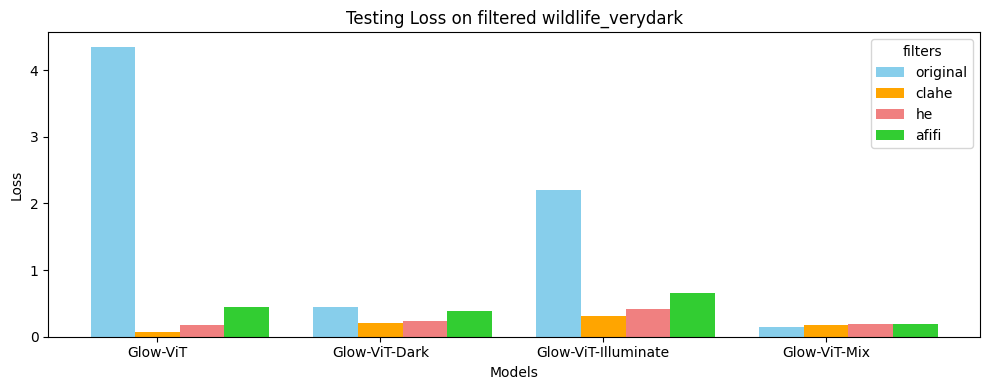

In [4]:
 
models = ["Glow-ViT", "Glow-ViT-Dark", "Glow-ViT-Illuminate", "Glow-ViT-Mix"]
filters = ["original", "clahe", "he", "afifi"]
eval_loss = {
    "Glow-ViT": [4.3495, 0.075, 0.1791, 0.4517],
    "Glow-ViT-Dark": [0.4528, 0.2089, 0.2324, 0.3838],
    "Glow-ViT-Illuminate": [2.2027, 0.3039, 0.419, 0.6543],
    "Glow-ViT-Mix": [0.1396, 0.1768, 0.1925, 0.1952],
}

x = np.arange(len(models))
width = 0.2
colors = ["skyblue", "orange", "lightcoral", "limegreen"]

fig, ax = plt.subplots(figsize=(10, 4))

for i, filter in enumerate(filters):    
    offset = (i - 1) * width
    ax.bar(x + offset, [eval_loss[model][i] for model in models], width, label=filter, color=colors[i])

ax.set_title("Testing Loss on filtered wildlife_verydark")
ax.set_xlabel("Models")
ax.set_ylabel("Loss")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(title="filters")

plt.tight_layout()
plt.show()

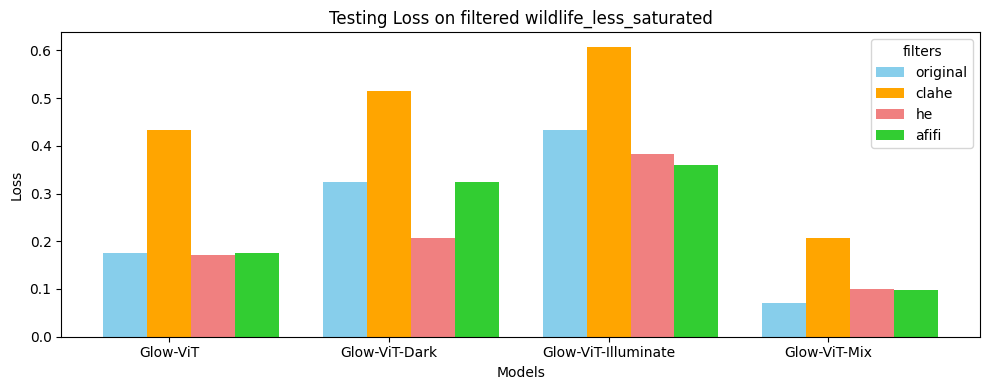

In [5]:
 
models = ["Glow-ViT", "Glow-ViT-Dark", "Glow-ViT-Illuminate", "Glow-ViT-Mix"]
filters = ["original", "clahe", "he", "afifi"]
eval_loss = {
    "Glow-ViT": [0.176, 0.4322, 0.1722, 0.1746],
    "Glow-ViT-Dark": [0.3231, 0.5156, 0.2069, 0.3232],
    "Glow-ViT-Illuminate": [0.4334, 0.6073, 0.3827, 0.3601],
    "Glow-ViT-Mix": [0.0707, 0.2070, 0.1004, 0.0977],
}

x = np.arange(len(models))
width = 0.2
colors = ["skyblue", "orange", "lightcoral", "limegreen"]

fig, ax = plt.subplots(figsize=(10, 4))

for i, filter in enumerate(filters):    
    offset = (i - 1) * width
    ax.bar(x + offset, [eval_loss[model][i] for model in models], width, label=filter, color=colors[i])

ax.set_title("Testing Loss on filtered wildlife_less_saturated")
ax.set_xlabel("Models")
ax.set_ylabel("Loss")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(title="filters")

plt.tight_layout()
plt.show()

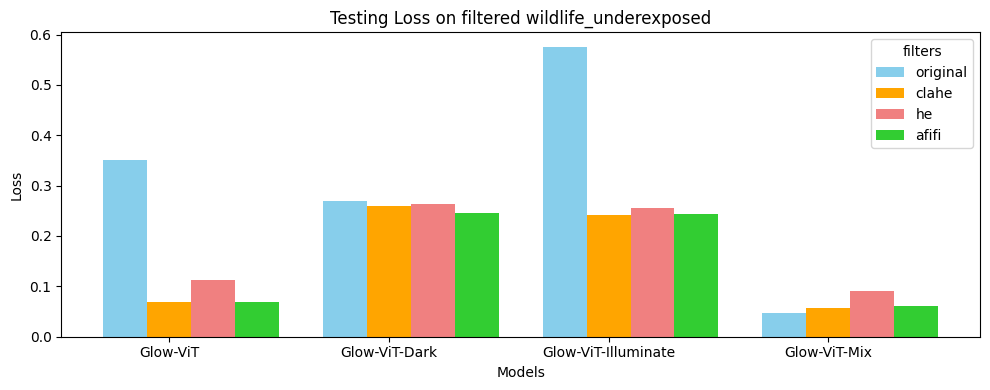

In [6]:
 
models = ["Glow-ViT", "Glow-ViT-Dark", "Glow-ViT-Illuminate", "Glow-ViT-Mix"]
filters = ["original", "clahe", "he", "afifi"]
eval_loss = {
    "Glow-ViT": [0.351, 0.0688, 0.1119, 0.0692],
    "Glow-ViT-Dark": [0.2702, 0.2596, 0.2636, 0.245],
    "Glow-ViT-Illuminate": [0.5756, 0.2424, 0.255, 0.2446],
    "Glow-ViT-Mix": [0.0472, 0.0577, 0.0917, 0.061],
}

x = np.arange(len(models))
width = 0.2
colors = ["skyblue", "orange", "lightcoral", "limegreen"]

fig, ax = plt.subplots(figsize=(10, 4))

for i, filter in enumerate(filters):    
    offset = (i - 1) * width
    ax.bar(x + offset, [eval_loss[model][i] for model in models], width, label=filter, color=colors[i])

ax.set_title("Testing Loss on filtered wildlife_underexposed")
ax.set_xlabel("Models")
ax.set_ylabel("Loss")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(title="filters")

plt.tight_layout()
plt.show()